In [1]:
import h5py
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [23]:
TRAIN_PATH = "../data/raw/g2net-detecting-continuous-gravitational-waves/train"
TEST_PATH = "../data/raw/g2net-detecting-continuous-gravitational-waves/test"
GEN_PATH = "../data/generated/gen-test/"

In [24]:
def load_hdf5(file_path):
    data = {}
    with h5py.File(file_path, "r") as f:
        ID_key = list(f.keys())[0]

        # Retrieve the Livingston decector data
        #L1_SFTs = f[ID_key]['L1']['SFTs']
        #L1_ts = f[ID_key]['L1']['timestamps_GPS']

        #H1_SFTs = f[ID_key]['H1']['SFTs']
        #data["1"] = f[ID_key]['H1']['timestamps_GPS']
    
        # Retrieve the frequency data
        data["frequency_Hz"] = np.array(f[ID_key]['frequency_Hz'])
    return data
  

In [25]:
data = []
L1_timestamps = []
H1_timestamps = []
labels = []
freq = []
for p in tqdm(os.listdir(TRAIN_PATH), total=len(os.listdir(TRAIN_PATH))):
    data = load_hdf5(os.path.join(TRAIN_PATH, p))
    freq.append(data['frequency_Hz'])

100%|██████████| 603/603 [00:14<00:00, 40.33it/s]


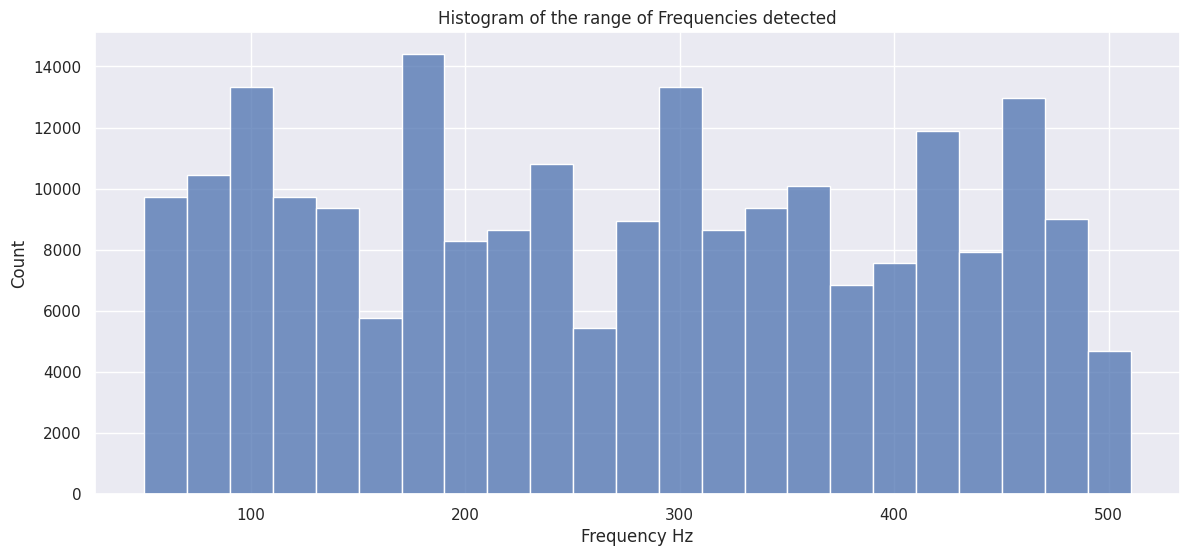

In [26]:
plt.figure(figsize=(14,6))
sns.histplot(x=list(np.hstack(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected');
plt.xlabel('Frequency Hz')
plt.show()

In [27]:
print(np.mean(np.asarray(freq), axis=1))
print(np.asarray(freq).shape)

[148.7225      94.0175     455.1925     464.16083333 354.05138889
  93.41916667 103.54916667 240.78416667 395.72472222  73.04361111
 231.58916667 440.09972222 114.87638889 330.77972222 173.06972222
 422.04305556 270.66472222 365.43805556 176.67083333 173.25972222
 474.11805556 285.7025     470.91972222 391.97972222 185.66972222
 173.57916667 297.22583333  70.46416667  80.90138889 326.58583333
 409.94916667 293.86805556 490.82694444  63.59027778 264.32583333
 385.22694444 383.50638889 352.82305556 208.3825     454.64861111
 293.51138889  99.73527778 352.48805556  65.52694444  87.69027778
 162.84472222 462.26805556 152.94305556 242.09972222 112.56527778
 328.17861111 410.57138889 302.36916667  82.95194444  85.28861111
 235.33694444 417.67861111  84.21305556 353.44805556 212.48194444
 320.27638889 107.9275     468.04583333 170.71916667 345.18861111
 251.03083333 101.27805556 204.68805556 453.98916667 209.04361111
  75.00638889 321.87805556 113.51138889 446.93138889 197.16027778
 331.74027

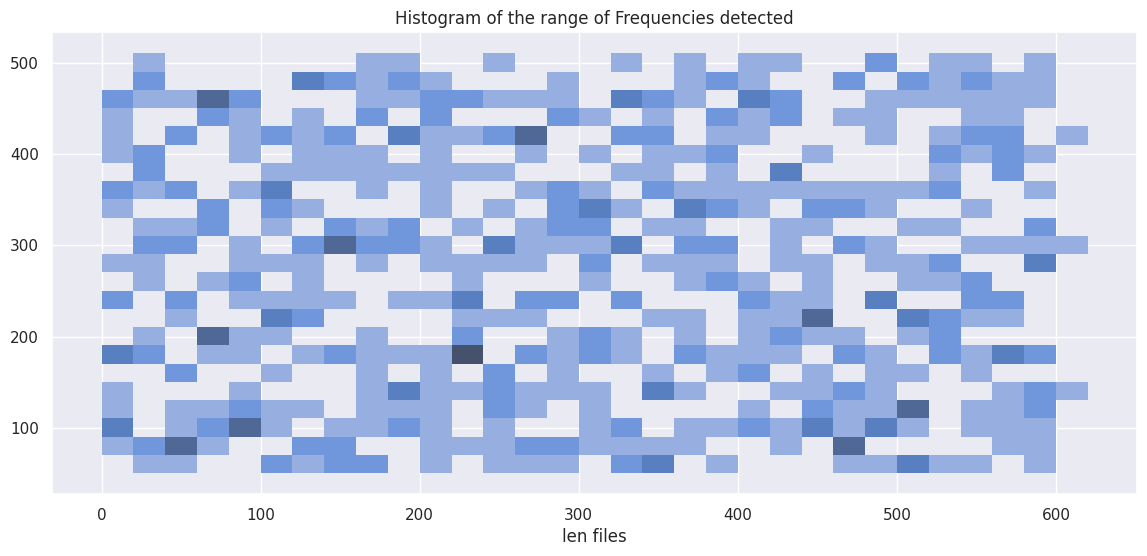

In [28]:
plt.figure(figsize=(14,6))
sns.histplot(y=np.mean(np.asarray(freq), axis=1), x=range(len(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected')
plt.xlabel('len files')
plt.show()

In [29]:
data = []
L1_timestamps = []
H1_timestamps = []
labels = []
freq = []
for p in tqdm(os.listdir(TEST_PATH), total=len(os.listdir(TEST_PATH))):
    data = load_hdf5(os.path.join(TEST_PATH, p))
    freq.append(data['frequency_Hz'])

100%|██████████| 7975/7975 [03:38<00:00, 36.57it/s]


In [30]:
print(np.mean(np.asarray(freq), axis=1))
print(np.asarray(freq).shape)

[145.19805556 237.83361111  88.21805556 ... 479.23083333 301.08583333
 274.16416667]
(7975, 360)


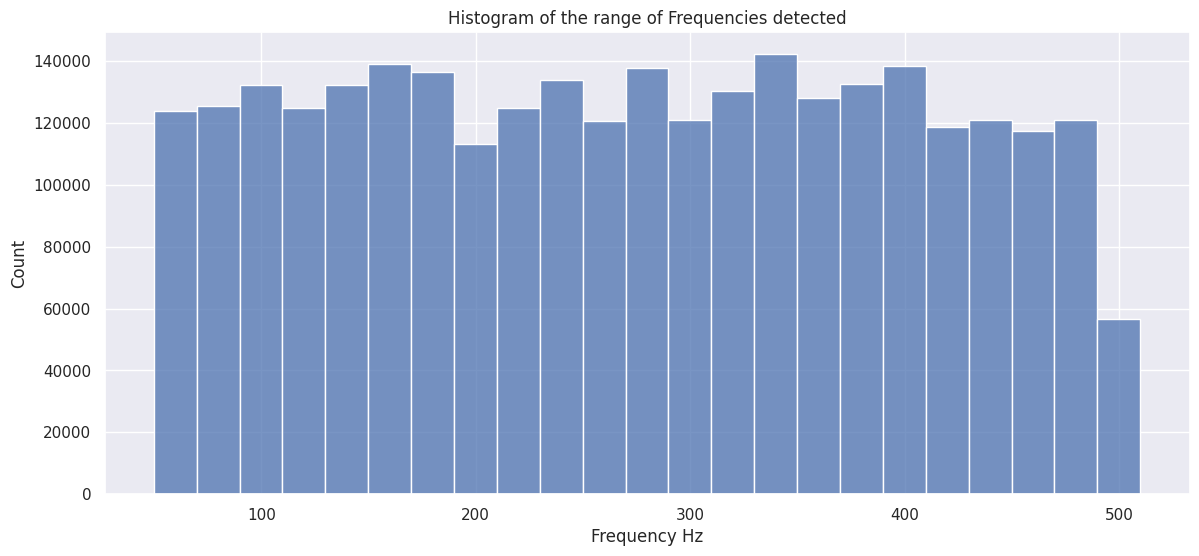

In [31]:
plt.figure(figsize=(14,6))
sns.histplot(x=list(np.hstack(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected')
plt.xlabel('Frequency Hz')
plt.show()

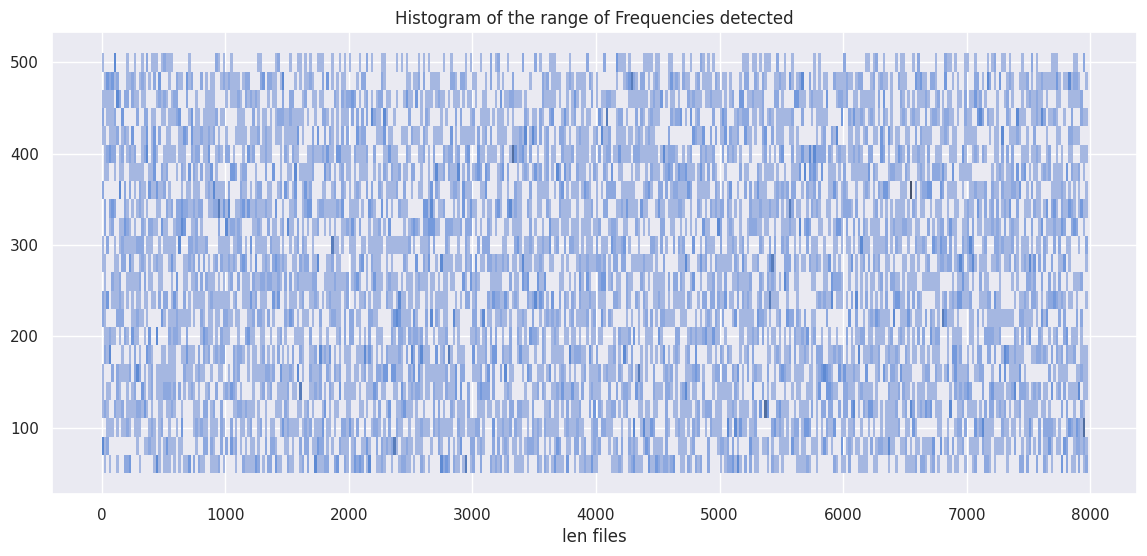

In [32]:
plt.figure(figsize=(14,6))
sns.histplot(y=np.mean(np.asarray(freq), axis=1), x=range(len(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected')
plt.xlabel('len files')
plt.show()

In [33]:
data = []
L1_timestamps = []
H1_timestamps = []
labels = []
freq = []
for p in tqdm(os.listdir(GEN_PATH), total=len(os.listdir(GEN_PATH))):
    data = load_hdf5(os.path.join(GEN_PATH, p))
    freq.append(data['frequency_Hz'])

 10%|▉         | 49/505 [00:01<00:09, 46.66it/s]


OSError: Unable to open file (file signature not found)

In [ ]:
print(np.mean(np.asarray(freq), axis=1))
print(np.asarray(freq).shape)

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(x=list(np.hstack(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected')
plt.xlabel('Frequency Hz')
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(y=np.mean(np.asarray(freq), axis=1), x=range(len(freq)), binwidth=20)
plt.title('Histogram of the range of Frequencies detected')
plt.xlabel('len files')
plt.show()

In [2]:
import sys
import pandas as pd
sys.path.append('../src/') 
from dataset import Dataset

/home/sokol/workspace/competitions/g2net-detecting-continuous-gravitational-waves/g2net-detecting-continuous-gravitational-waves/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
TRAIN_PROCESSED_PATH = "../data/processed"
TEST_PROCESSED_PATH = "../data/processed"
GEN_PROCESSED_PATH = "../data/processed"

In [12]:
def plot(img):
    plt.figure(figsize=(8, 3))
    plt.grid(False)

    # Hide axes ticks
    plt.axis('off')
    plt.title('Spectrogram')
    plt.xlabel('time')
    plt.ylabel('frequency')
    plt.imshow(img[0, 0:360])
    plt.colorbar()
    plt.show()

1.0


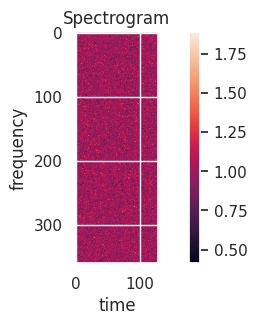

1.0


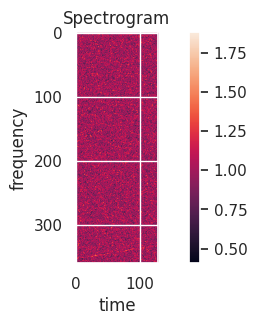

1.0


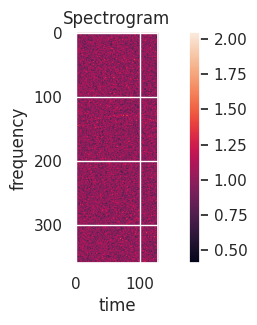

1.0


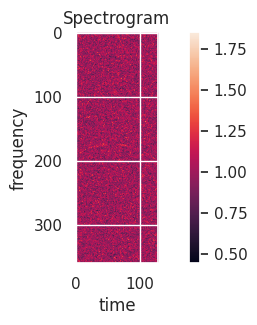

1.0


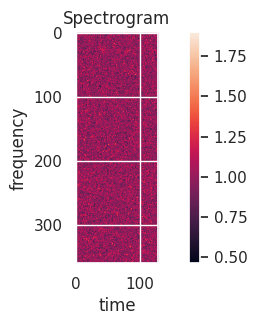

1.0


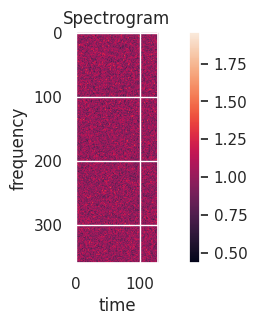

1.0


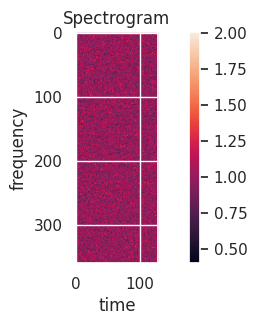

0.0


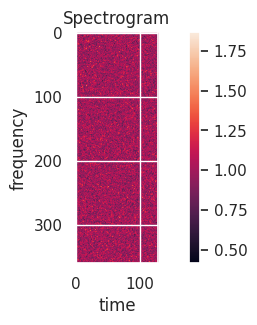

1.0


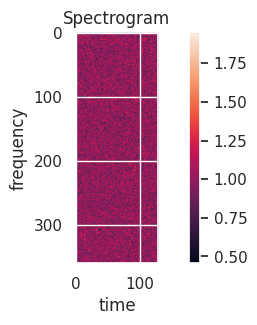

1.0


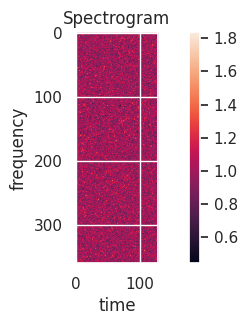

1.0


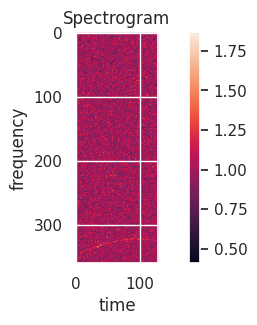

0.0


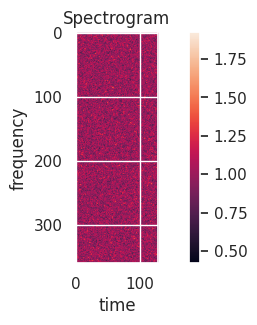

1.0


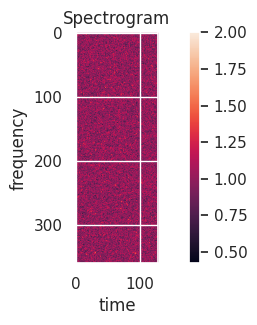

0.0


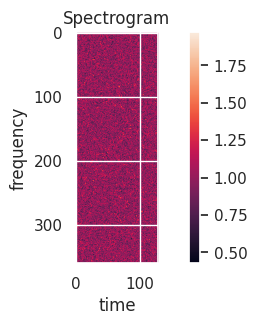

1.0


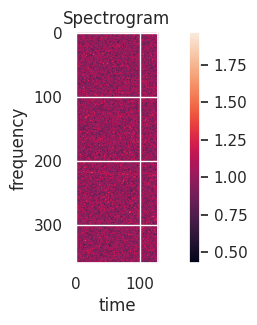

1.0


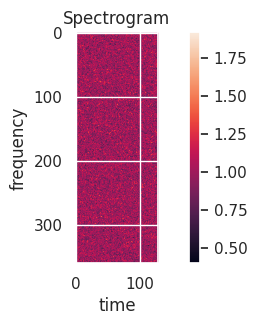

1.0


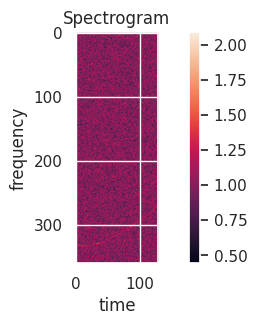

1.0


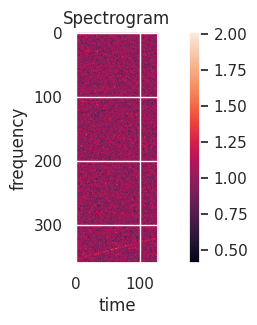

1.0


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("../data/processed/train_labels_baseline.csv")
dataset = Dataset(TRAIN_PROCESSED_PATH, df)
img, y = dataset[50]

for img, y in dataset:
    print(y)
    plot(img)


0.5


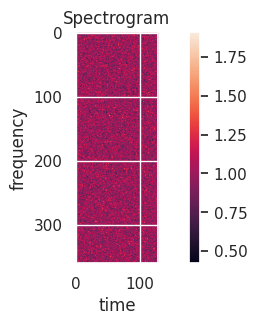

0.5


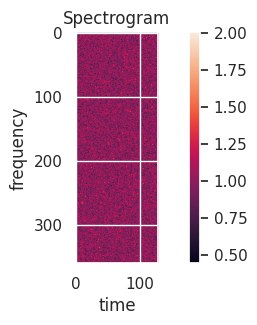

0.5


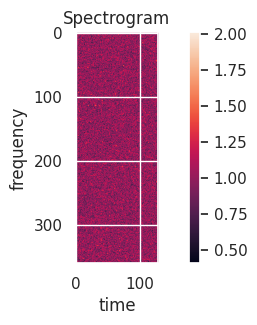

0.5


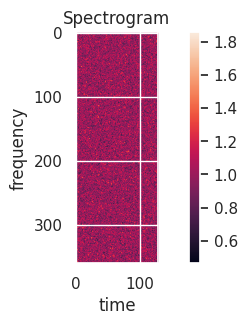

0.5


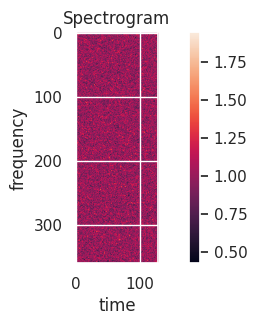

0.5


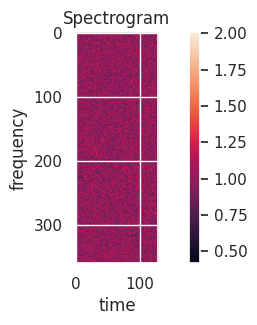

0.5


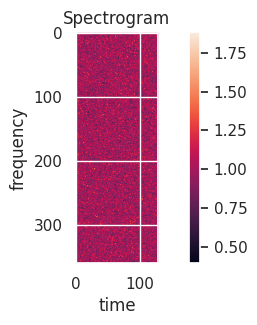

0.5


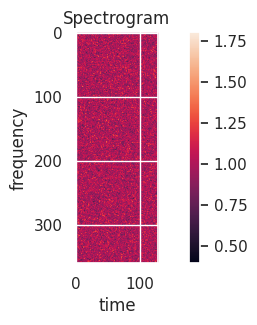

0.5


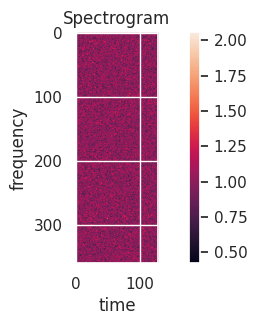

0.5


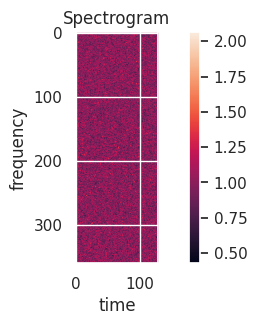

0.5


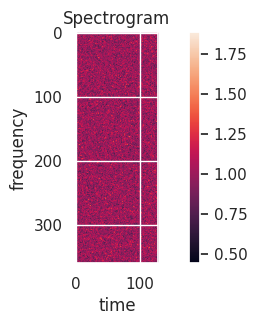

0.5


KeyboardInterrupt: 

In [15]:
df = pd.read_csv("../data/processed/test_labels.csv")
dataset = Dataset(TEST_PROCESSED_PATH, df)
img, y = dataset[50]

for img, y in dataset:
    print(y)
    plot(img)



1.0


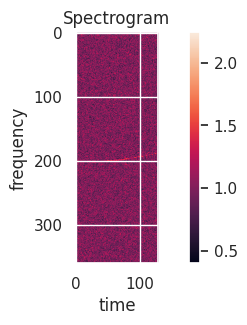

1.0


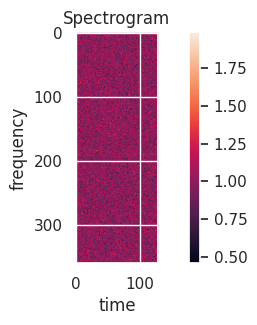

1.0


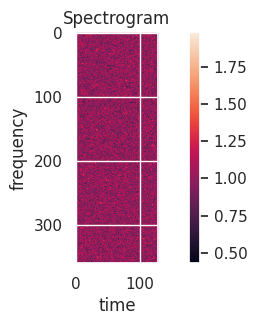

1.0


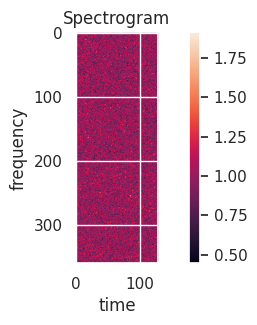

1.0


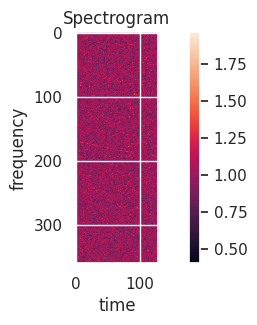

1.0


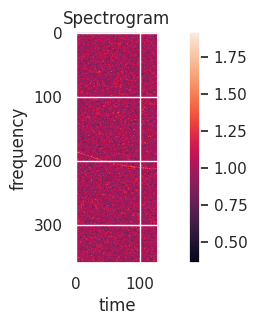

1.0


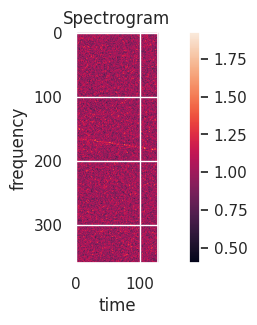

1.0


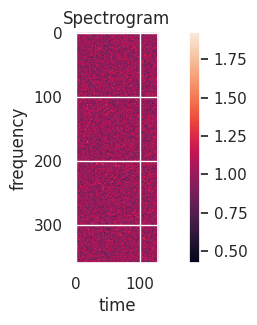

1.0


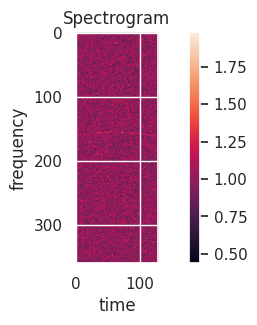

1.0


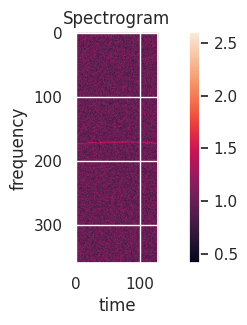

KeyboardInterrupt: 

In [6]:
df = pd.read_csv("../data/processed/generated_signal_baseline.csv")
dataset = Dataset(GEN_PROCESSED_PATH, df)
img, y = dataset[50]

for img, y in dataset:
    print(y)
    plot(img)


In [28]:
df = pd.read_csv("../data/processed/generated_noise.csv")
dataset = Dataset(GEN_PROCESSED_PATH, df)
img, y = dataset[50]

for img, y in dataset[:20]:
    plot(img)
    print(y)


FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/0      generated_noise_baseline/noise_0\n1      generated_noise_baseline/noise_1\n2      generated_noise_baseline/noise_2\n3      generated_noise_baseline/noise_3\n4      generated_noise_baseline/noise_4\n5      generated_noise_baseline/noise_5\n6      generated_noise_baseline/noise_6\n7      generated_noise_baseline/noise_7\n8      generated_noise_baseline/noise_8\n9      generated_noise_baseline/noise_9\n10    generated_noise_baseline/noise_10\n11    generated_noise_baseline/noise_11\n12    generated_noise_baseline/noise_12\n13    generated_noise_baseline/noise_13\n14    generated_noise_baseline/noise_14\n15    generated_noise_baseline/noise_15\n16    generated_noise_baseline/noise_16\n17    generated_noise_baseline/noise_17\n18    generated_noise_baseline/noise_18\n19    generated_noise_baseline/noise_19\nName: id, dtype: object.npy'

1.0
(2, 360, 128)


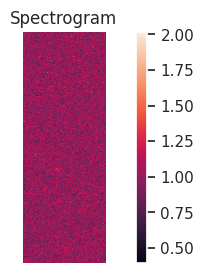

1.0
(2, 360, 128)


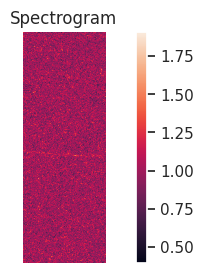

1.0
(2, 360, 128)


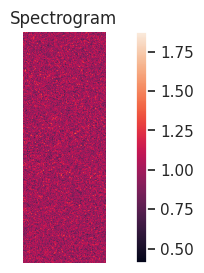

1.0
(2, 360, 128)


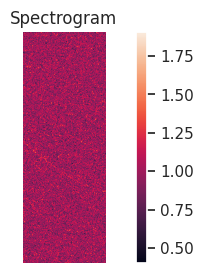

1.0
(2, 360, 128)


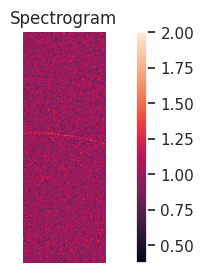

1.0
(2, 360, 128)


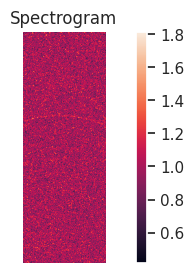

1.0
(2, 360, 128)


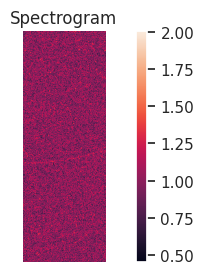

1.0
(2, 360, 128)


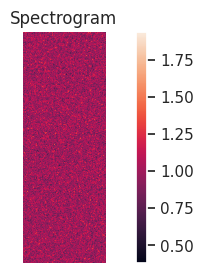

1.0
(2, 360, 128)


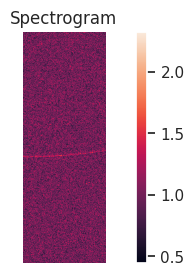

1.0
(2, 360, 128)


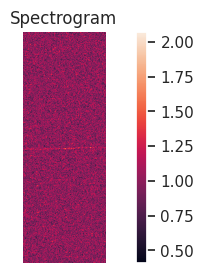

1.0
(2, 360, 128)


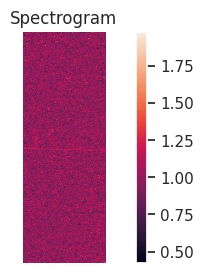

1.0
(2, 360, 128)


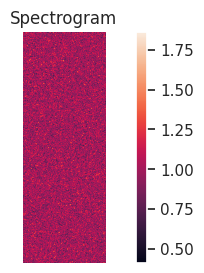

1.0
(2, 360, 128)


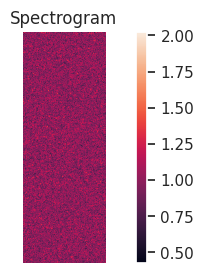

1.0
(2, 360, 128)


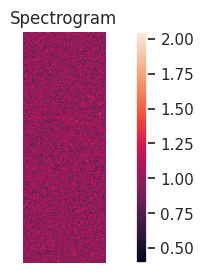

1.0
(2, 360, 128)


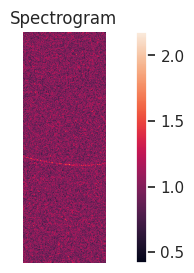

1.0
(2, 360, 128)


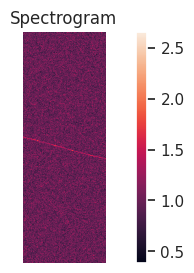

1.0
(2, 360, 128)


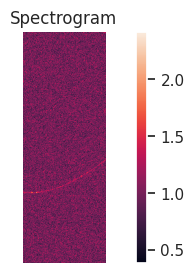

1.0
(2, 360, 128)


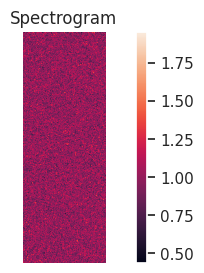

1.0
(2, 360, 128)


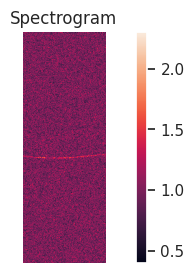

1.0
(2, 360, 128)


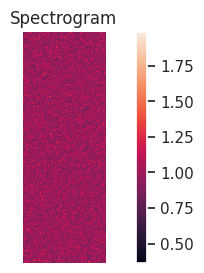

In [14]:
df = pd.read_csv("../data/generated/gen-test.csv")
dataset = Dataset("../data/generated/", df)

for img, y in dataset:
    print(y)
    print(img.shape)
    plot(img)


1.0
(2, 360, 128)


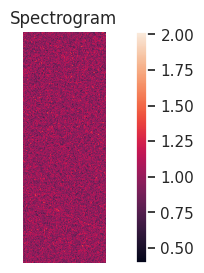

1.0
(2, 360, 128)


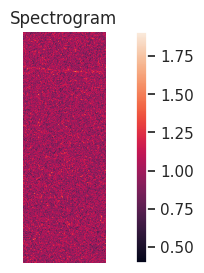

1.0
(2, 360, 128)


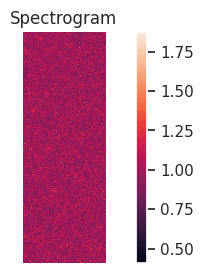

1.0
(2, 360, 128)


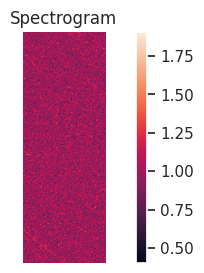

1.0
(2, 360, 128)


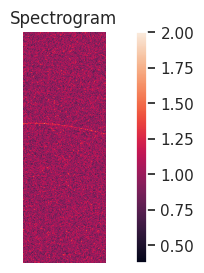

1.0
(2, 360, 128)


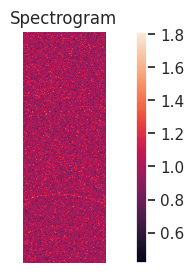

1.0
(2, 360, 128)


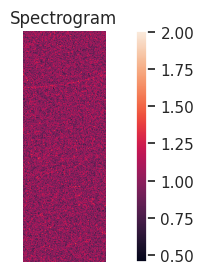

1.0
(2, 360, 128)


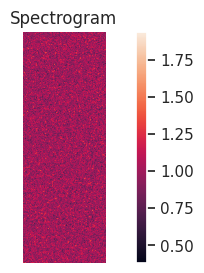

1.0
(2, 360, 128)


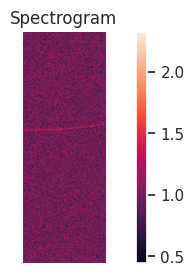

1.0
(2, 360, 128)


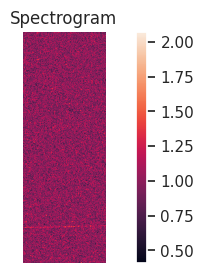

1.0
(2, 360, 128)


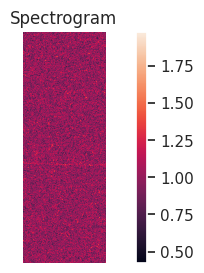

1.0
(2, 360, 128)


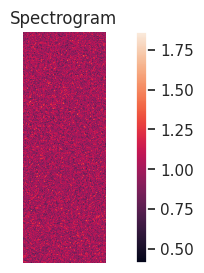

1.0
(2, 360, 128)


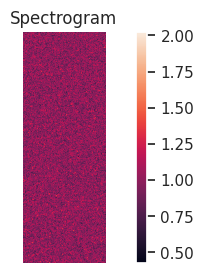

1.0
(2, 360, 128)


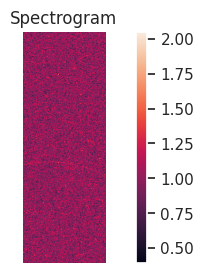

1.0
(2, 360, 128)


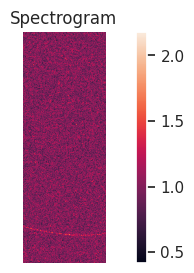

1.0
(2, 360, 128)


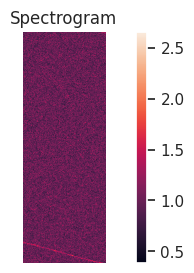

1.0
(2, 360, 128)


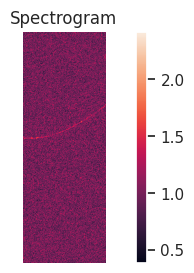

1.0
(2, 360, 128)


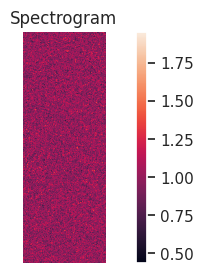

1.0
(2, 360, 128)


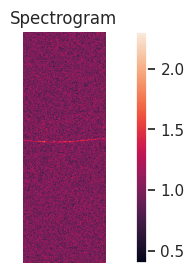

1.0
(2, 360, 128)


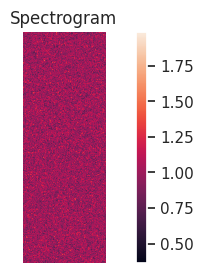

In [15]:
df = pd.read_csv("../data/generated/gen-test.csv")
dataset = Dataset("../data/generated/", df)

for img, y in dataset:
    print(y)
    print(img.shape)
    plot(np.roll(img, np.random.randint(low=200, high=img.shape[1]), axis=1))